In **supervised learning**, machine learning model is trained on a labeled dataset, where each example contains input features and an associated target variable (or label). The major objective of supervised learning is to understand & model the relationship, i.e. learn a mapping from input features to the response variable, such that the model is able to make accurate predictions on unseen or test data. Supervised learning can be further categorized into regression (for continuous target variables) and classification (for categorical target variables).

**Example**: Training a spam email filter using classification via Naive Bayes. In this case, the dataset consists of emails along with labels indicating whether each email is spam or not. The algorithm learns patterns in the emails' features (e.g., words, frequencies) associated with the labels (spam or not spam), enabling it to classify new emails as spam or not spam.

In **unsupervised learning**, the algorithm is trained without any explicit labels or target variables. There is no ground truth or single truth about the data and the requirement is to explain the dataset using the best possible model. In other words, the goal of unsupervised learning is to find hidden patterns or structures in the data. Unsupervised learning tasks include clustering, dimensionality reduction, and density estimation.

**Example**: Customer segmentation. Suppose we have a dataset containing customer purchase histories (e.g., items purchased, purchase frequency, total spending) but without any labels indicating customer segments. By applying unsupervised learning techniques such as clustering, the algorithm can identify groups of customers who exhibit similar purchasing behavior and create tailor made marketing strategies for each cluster.

**K-means clustering** is almost guaranteed to **converge** because of the nature of the iterative optimization process. The first step is Initialization wherein cluster centroids are randomly initialized in the feature space. Secondly, each data point in the dataset is assigned to the nearest centroid, breaking down the data into clusters. Most importantly, the centroids are then recalculated as the mean of all data points assigned to each cluster. This step adjusts the position of the centroids and brings them closer to the center of their corresponding clusters.

The second (assignment) and third (recalculating centroids) are repeated iteratively until convergence, when the centroids no longer shift positions or change significantly because they have reached a stage where they are truly representative of their data points. Hence, K means clustering is 'almost' guaranteed to converge.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

In [2]:
df = pd.read_csv('airline-safety.csv')
df.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [3]:
df.drop(columns=['airline', 'avail_seat_km_per_week',],inplace=True) 
#dropping non numeric and non relevant columns
df.head()

,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,2,0,0,0,0,0
1,76,14,128,6,1,88
2,6,0,0,1,0,0
3,3,1,64,5,0,0
4,2,0,0,2,0,0


In [4]:
#preprocessing and standardizing data
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [5]:
linkage_matrix = sch.linkage(df, method='complete')

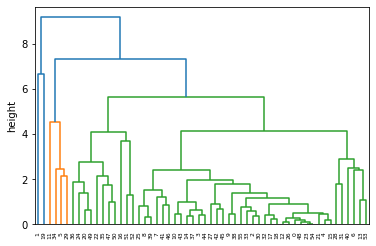

In [6]:
# plotting dendogram
dendrogram = sch.dendrogram(linkage_matrix)
plt.ylabel('height')
plt.savefig('dendogram.png', dpi=300)

Here, we are performing agglomerative clustering.

In [7]:
cluster = AgglomerativeClustering(n_clusters=5, linkage='complete')

In [8]:
cluster_preds = cluster.fit_predict(df)
print(cluster_preds)

[2 3 2 2 2 0 2 2 2 2 2 0 2 2 2 2 1 2 2 4 1 2 1 2 1 2 2 2 2 0 2 2 2 2 0 1 1
 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 2 2]


Now we will try K means clustering

In [9]:
df = pd.read_csv('airline-safety.csv')

In [10]:
#transforming data for simplicity
df['incidents_85_14'] = df['incidents_85_99'] + df['incidents_00_14'] #total incidents
df['fatalities_85_14'] = df['fatalities_85_99'] + df['fatalities_00_14'] #total fatalities

In [11]:
df.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,incidents_85_14,fatalities_85_14
0,Aer Lingus,320906734,2,0,0,0,0,0,2,0
1,Aeroflot*,1197672318,76,14,128,6,1,88,82,216
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0,7,0
3,Aeromexico*,596871813,3,1,64,5,0,0,8,64
4,Air Canada,1865253802,2,0,0,2,0,0,4,0


In [12]:
X = df.loc[:,['incidents_85_14','fatalities_85_14']]
X.head()

,incidents_85_14,fatalities_85_14
0,2,0
1,82,216
2,7,0
3,8,64
4,4,0


In [13]:
X = scaler.fit_transform(X) #standardizing 

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [15]:
# Predict the clusters
y_means = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

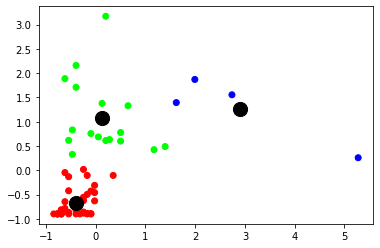

In [16]:
# Plot the clusters
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap='brg')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=200, c='black')

The black dots above represent our 3 clusters with similar safety records. The somewhat different results demonstrate that the two methods do not capture the same underlying aspects of the data. Agglomerative clustering is a bottom-up clustering strategy, which works its way up by merging similar data points together. On the other hand, K-means clustering is a Divisive strategy which is top-down in nature and relies on categorizing or partitioning data in 2 to many clusters.

Other reasons for difference in results include the number of clusters, linkage method, and choice of distance metric. In addition, the difference in the results may also be related to the random initialization of centroids in K-means clustering.

In [21]:
y_means

array([1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 0, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1], dtype=int32)